In [52]:
#step1 데이터를 읽어온다.
import numpy as np
data = np.genfromtxt('joydatanoise.txt')

In [53]:
#stpe2 데이터를 셔플링한 후, train과 test를 7:3 으로 나눈다.
np.random.seed(0)
np.random.shuffle(data)
x,y = data[:, :2], data[:, 2]
y = y.astype(np.int)
#w = np.array(np.random.random(3))
w = np.array([0.0,1.0, 0.5])
W = np.array([w])

num = int(x.shape[0]*0.7)  # 100*0.7 = 70
x_train, x_test = x[:num], x[num:]
y_train, y_test = y[:num], y[num:]
print(x_train[:5])
print(x_test[:5])


[[ 1.26  1.17]
 [-0.11 -3.43]
 [ 1.56  2.85]
 [-1.5   0.24]
 [-2.95 -1.16]]
[[ 3.87  2.91]
 [ 0.85  1.46]
 [ 3.16  3.34]
 [-1.2  -0.71]
 [-1.69  0.7 ]]


In [54]:
#step3 특성벡터 train과 test자료 배열에 x0=1을 추가한다.
X_train= np.c_[ np.ones(len(x_train)), x_train ]
X_test= np.c_[ np.ones(len(x_test)), x_test ]
print(X_train[:5])
print(X_test[:5])

[[ 1.    1.26  1.17]
 [ 1.   -0.11 -3.43]
 [ 1.    1.56  2.85]
 [ 1.   -1.5   0.24]
 [ 1.   -2.95 -1.16]]
[[ 1.    3.87  2.91]
 [ 1.    0.85  1.46]
 [ 1.    3.16  3.34]
 [ 1.   -1.2  -0.71]
 [ 1.   -1.69  0.7 ]]


In [55]:
#step4 학습을 진행하여 가중치 w를 구합니다.
import matplotlib.pyplot as plt
%matplotlib inline
%run plot_xyw.py


def perceptron_train(X, y, w = None, eta=0.1, epochs=5, random_seed=1):
    if w is None:
        np.random.RandomState(random_seed) 
        w = np.random.random((X.shpae[1],1))
    maxy, miny = y.max(), y.min()

    for _ in range(epochs): 
        for xi, yi in zip(X, y):
            xi = xi.reshape(w.shape)
            z = np.dot(w.T, xi)                              # Compute net input, same as np.dot(w.T, x)
            yhat = np.where(z >= 0.0, maxy, miny)          # Apply step func and get output
            delta = eta * (yi - yhat) * xi                 # Compute delta    
            w += delta                                     # Adjust weight
          
    return w



epochs = 2   # 학습 다시 하는 횟수
for _ in range(epochs):
    w = perceptron_train(X_train, y_train, w, eta = 0.05, epochs=1)
    W = np.vstack([W,w])
   



Misclassified: 3/70


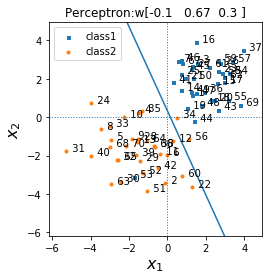

In [60]:
#step5 Train과 test 자료에 대하여 각각 예측과 평가를 진행한다.
def perceptron_predict(X,w):
    z = np.dot(X,w)
    yhat = np.where(z>0., 1,0)  # y_hat이 어떤 값을 예측하는지가 중요 (1 or -1)인지 혹은 (1 or 0)인지.
    return yhat

#train
yhat = perceptron_predict(X_train, w)
m_samples = len(y_train)
missed = np.sum(yhat.flatten()!= y_train)
print('Misclassified: {}/{}'.
     format(missed, m_samples))
plot_xyw(x_train,y_train,w, annotate = True)

Misclassified: 0/30


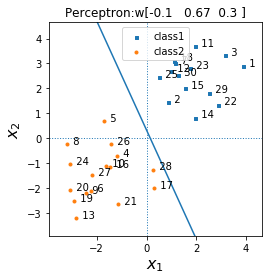

In [61]:
#test
yhat = perceptron_predict(X_test, w)
m_samples = len(y_test)
missed = np.sum(yhat.flatten()!= y_test)
print('Misclassified: {}/{}'.
     format(missed, m_samples))
plot_xyw(x_test,y_test,w, annotate = True)
